## 파이썬 고급
# Numpy 기본
- Iris 데이터를 파이썬 기본 기능만으로 읽어온다.
- Iris 데이터를 Numpy 기능으로 읽어온다.
- Numpy 어레이(array) 구조를 이해한다.
- Iris 데이터를 그래프로 그려본다.

### 파일 다루기

In [7]:
f = open('숫자.txt')
f.readline()
f.readline()
line = f.readline()
f.close()

print(line)

셋



In [9]:
import numpy as np

### Iris 데이터 읽어오기(1)
- 파이썬 기본 기능만을 가지고 읽어와 보자.

In [10]:
f = open('iris.csv')

f.readline() # 첫번째 줄(헤더) 읽기

data = []
for line in f:
    l = line.strip().split(',') # 개행문자를 없애고, 쉼표로 분리하여 리스트를 얻음
    
    # 문자로 된 숫자들을 실수로 변환한다
    l[0] = float(l[0])
    l[1] = float(l[1])
    l[2] = float(l[2])
    l[3] = float(l[3])

    # 품종 3가지를 숫자로 바꾸어 준다
    if l[4] == 'Iris-setosa':
        l[4] = 0
    elif l[4] == 'Iris-versicolor':
        l[4] = 1
    else:
        l[4] = 2

    data.append(l)

f.close()

# Numpy array 로 변환한다
iris = np.array(data)

In [11]:
iris

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [8]:
iris.shape # 150X5 테이블 형태

(150, 5)

In [6]:
iris.dtype # 실수형

dtype('float64')

In [7]:
iris.ndim # 2차원

2

- Numpy 의 인덱싱

In [8]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

In [9]:
iris[:,4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

### Iris 데이터 읽어오기(2)

In [22]:
f = open('iris.csv')

# 첫 줄에 있는 속성 이름들을 저장해 놓은다
line = f.readline()
iris_features = line.strip().split(',')[:4] # ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

iris_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

data = []
for line in f:
    l = line.strip().split(',')
    
    l[:4] = [float(i) for i in l[:4]]

    l[4] = iris_labels.index(l[4]) # index() 함수는 해당 값의 인덱스 번호를 알려준다
    
    data.append(l)

f.close()

iris = np.array(data)

In [11]:
iris.shape

(150, 5)

In [13]:
iris_features

['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']

In [14]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

### Iris 데이터 읽어오기(3)
- Numpy 함수인 loadtxt() 함수를 이용하자.

In [3]:
iris_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',',
                  converters={4: lambda s: iris_labels.index(s.decode())})

# iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',',
#                   converters={4: lambda s: labels.index(s)}, encoding='utf-8') # latin1, ascii, utf-8, cp949

In [ ]:
#iris!!!

In [5]:
display(type(iris), iris.shape, iris.dtype, len(iris), iris[0], len(iris[0]))

numpy.ndarray

(150, 5)

dtype('float64')

150

array([5.1, 3.5, 1.4, 0.2, 0. ])

5

### 행(샘플, 레코드) 읽기

In [27]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

In [28]:
iris[1]

array([4.9, 3. , 1.4, 0.2, 0. ])

In [29]:
iris[149]

array([5.9, 3. , 5.1, 1.8, 2. ])

In [30]:
iris[-1]

array([5.9, 3. , 5.1, 1.8, 2. ])

In [32]:
iris[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [33]:
iris[50:55]

array([[7. , 3.2, 4.7, 1.4, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [6.5, 2.8, 4.6, 1.5, 1. ]])

In [34]:
iris[-5:]

array([[6.7, 3. , 5.2, 2.3, 2. ],
       [6.3, 2.5, 5. , 1.9, 2. ],
       [6.5, 3. , 5.2, 2. , 2. ],
       [6.2, 3.4, 5.4, 2.3, 2. ],
       [5.9, 3. , 5.1, 1.8, 2. ]])

In [12]:
# Iris-setosa 에 해당하는 줄들만 뽑아라
setosa = iris[0:50] # iris[:50]
versicolor = iris[50:100]
virginica = iris[100:] # iris[-50:]

In [13]:
versicolor

array([[7. , 3.2, 4.7, 1.4, 1. ],
       [6.4, 3.2, 4.5, 1.5, 1. ],
       [6.9, 3.1, 4.9, 1.5, 1. ],
       [5.5, 2.3, 4. , 1.3, 1. ],
       [6.5, 2.8, 4.6, 1.5, 1. ],
       [5.7, 2.8, 4.5, 1.3, 1. ],
       [6.3, 3.3, 4.7, 1.6, 1. ],
       [4.9, 2.4, 3.3, 1. , 1. ],
       [6.6, 2.9, 4.6, 1.3, 1. ],
       [5.2, 2.7, 3.9, 1.4, 1. ],
       [5. , 2. , 3.5, 1. , 1. ],
       [5.9, 3. , 4.2, 1.5, 1. ],
       [6. , 2.2, 4. , 1. , 1. ],
       [6.1, 2.9, 4.7, 1.4, 1. ],
       [5.6, 2.9, 3.6, 1.3, 1. ],
       [6.7, 3.1, 4.4, 1.4, 1. ],
       [5.6, 3. , 4.5, 1.5, 1. ],
       [5.8, 2.7, 4.1, 1. , 1. ],
       [6.2, 2.2, 4.5, 1.5, 1. ],
       [5.6, 2.5, 3.9, 1.1, 1. ],
       [5.9, 3.2, 4.8, 1.8, 1. ],
       [6.1, 2.8, 4. , 1.3, 1. ],
       [6.3, 2.5, 4.9, 1.5, 1. ],
       [6.1, 2.8, 4.7, 1.2, 1. ],
       [6.4, 2.9, 4.3, 1.3, 1. ],
       [6.6, 3. , 4.4, 1.4, 1. ],
       [6.8, 2.8, 4.8, 1.4, 1. ],
       [6.7, 3. , 5. , 1.7, 1. ],
       [6. , 2.9, 4.5, 1.5, 1. ],
       [5.7, 2

### 한 항목 읽기
- 콤마를 기준으로 앞은 **행번호**, 뒤는 **열번호**

In [35]:
iris[0,0]

5.1

In [36]:
iris[50,3]

1.4

In [37]:
iris[0,4], iris[0,-1], iris[-1,0], iris[-1,-1]

(0.0, 0.0, 5.9, 2.0)

### 열(칼럼, 속성) 읽기

In [38]:
iris[:,0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [39]:
iris[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [40]:
iris[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

- 일반적으로 데이터 부분을 X 로, 목표값 부분을 y 로 표시한다

In [42]:
X = iris[:,:4]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [43]:
X.shape

(150, 4)

In [47]:
y = iris[:,4]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [48]:
y.shape

(150,)

- 위에서 y.shape 는 (150,) 으로 튜플로 표시되는데, 이것은 항목이 150개인 1차원 데이터를 의미한다

In [ ]:
X = iris[:, :4] # iris[:, :-1]
y = iris[:, 4]  # iris[:, -1]

### 직사각형 잘라내기

In [49]:
iris[48:52,1:3]

array([[3.7, 1.5],
       [3.3, 1.4],
       [3.2, 4.7],
       [3.2, 4.5]])

In [50]:
iris[:3,:3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3]])

In [14]:
iris[-3:, -3:]

array([[5.2, 2. , 2. ],
       [5.4, 2.3, 2. ],
       [5.1, 1.8, 2. ]])

### 그래프 그려보기

In [16]:
import matplotlib.pyplot as plt

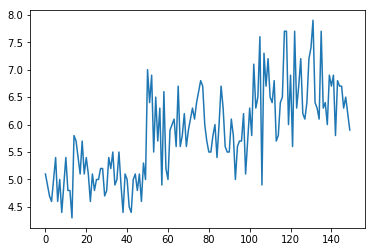

In [53]:
plt.plot(iris[:,0])

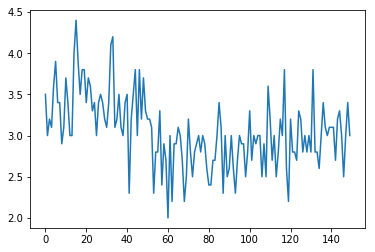

In [54]:
plt.plot(iris[:,1])

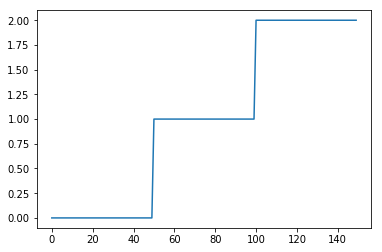

In [55]:
plt.plot(iris[:,-1])

In [21]:
iris_features

NameError: name 'iris_features' is not defined

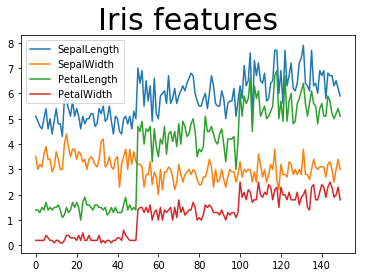

In [24]:
plt.plot(iris[:,0], label='SepalLength')
plt.plot(iris[:,1], label='SepalWidth')
plt.plot(iris[:,2], label='PetalLength')
plt.plot(iris[:,3], label='PetalWidth')

plt.title('Iris features', fontsize=30)
plt.legend()

Text(0,0.5,'PetalWidth')

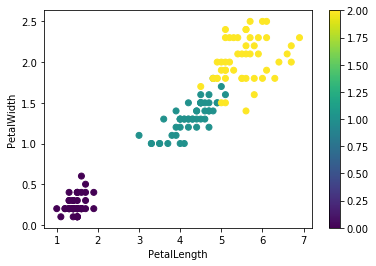

In [26]:
plt.scatter(iris[:,2], iris[:,3], c=iris[:,-1])
plt.colorbar()

plt.xlabel('PetalLength')
plt.ylabel('PetalWidth')

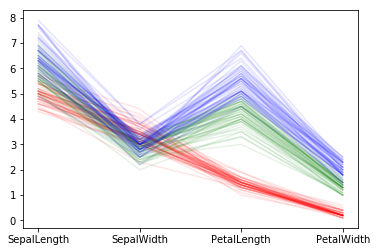

In [68]:
plt.plot(iris[:50,:4].T, 'r-', alpha=0.1)
plt.plot(iris[50:100,:4].T, 'g-', alpha=0.1)
plt.plot(iris[100:,:4].T, 'b-', alpha=0.1)

plt.xticks(range(4),['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
pass